**Problema 2.1** Para descender en la función de pérdida (ecuación 2.5), medimos su gradiente con respecto a los parámetros $\phi_0$ y $\phi_1$. Calcula las expresiones para las pendientes $\frac{\partial L}{\partial \phi_0}$ y $\frac{\partial L}{\partial \phi_1}$.  


La función de pérdida es:

$$
L[\phi] = \sum_{i=1}^{I} \left( f[x_i, \phi] - y_i \right)^2
$$

$$
= \sum_{i=1}^{I} \left( \phi_0 + \phi_1 x_i - y_i \right)^2.
\quad \quad \quad \quad (2.5)
$$


Para calcular esas derivadas parciales tenemos que realizar regla de la cadena:

$$ 
\frac{\partial g(h(\phi_0))}{\partial \phi_0} = g'(h(\phi_0)) * h'(\phi_0)
 $$

- Función externa es $g(u) = u ^2 $ así su derivada es $g'(u)= 2u$
- Función interna es $h_i(\phi_0, \phi_1) = \phi_0 + \phi_1 x_i - y_i $ y sus derivada respectivamente es:
 $$\frac{\partial h_i}{\partial \phi_0}  = 1 $$
  $$\frac{\partial h_i}{\partial \phi_1}  = x $$

Calculemos la derivada parcial de cada una:

$$ 
\frac{\partial g(h(\phi_0))}{\partial \phi_0} = g'(h(\phi_0)) * h'(\phi_0)
 $$

$$ 
\frac{\partial g(h(\phi_0))}{\partial \phi_0} = 2 (\phi_0 + \phi_1 x_i - y_i) * 1
 $$ 

Luego para la otra derivada es

$$ 
\frac{\partial g(h(\phi_1))}{\partial \phi_1} = g'(h(\phi_1)) * h'(\phi_1)
 $$

$$ 
\frac{\partial g(h(\phi_0))}{\partial \phi_0} = 2 (\phi_0 + \phi_1 x_i - y_i) * x
 $$

Finalmente tenemos:

- Para $\phi_0 $:

  $$
  \frac{\partial L}{\partial \phi_0} = 2 \sum_{i=1}^{I} (\phi_0 + \phi_1 x_i - y_i).
  $$

- Para $\phi_1 $:

  $$
  \frac{\partial L}{\partial \phi_1} = 2 \sum_{i=1}^{I} (\phi_0 + \phi_1 x_i - y_i) x_i.
  $$



**Problema 2.2** Muestra que podemos encontrar el mínimo de la función de pérdida en forma cerrada estableciendo la expresión para las derivadas del problema 2.1 igual a cero y resolviendo para $\phi_0$ y $\phi_1$. Nota que esto funciona para regresión lineal, pero no para modelos más complejos; por esta razón utilizamos métodos iterativos de ajuste de modelos como el descenso de gradiente (figura 2.4).  


- Para $\phi_0 $:

  $$
  0 = 2 \sum_{i=1}^{I} (\phi_0 + \phi_1 x_i - y_i).\\
  
  0 = \sum_{i=1}^{I} \phi_0 + \sum_{i=1}^I \phi_1 x_i - y_i \\

  0 = I * \phi_0  + \sum_{i=1}^I \phi_1 x_i - y_i \\

  \phi_0 =  - \sum_{i=1}^I \phi_1 x_i - y_i * \frac{1}{I}
  $$


- Para $\phi_1 $:

  $$
  0 = 2 \sum_{i=1}^{I} (\phi_0 + \phi_1 x_i - y_i) x_i. \\

  0 = \sum_{i=i}^{I} \phi_0 * x_i + \sum_{i=i}^{I} \phi_1 * x_i^2  - \sum_{i=i}^{I} y_i* x_i \\

  \phi_1 * \sum_{i=i}^{I}  x_i^2 = -  \sum_{i=i}^{I} \phi_0 * x_i  +  \sum_{i=i}^{I} y_i* x_i \\

  \phi_1 = \frac{-  \sum_{i=i}^{I} \phi_0 * x_i  +  \sum_{i=i}^{I} y_i* x_i}{\sum_{i=i}^{I}  x_i^2}
  $$


**Problema 2.3** Considera reformular la regresión lineal como un modelo generativo, de modo que tenemos $x = g(y, \phi) = \phi_0 + \phi_1 y$. ¿Cuál es la nueva función de pérdida? Encuentra una expresión para la función inversa $y = g^{-1}(x, \phi)$ que usaríamos para realizar inferencia. ¿Este modelo hará las mismas predicciones que la versión discriminativa para un conjunto de datos de entrenamiento $\{x_i, y_i\}$? Una forma de comprobarlo es escribir código que ajuste una línea a tres puntos de datos usando ambos métodos y ver si el resultado es el mismo.  


**Problema 2.3**  
- ¿Cuál es la nueva función de perdida?

$L = \sum_{i = 1}  (g(y, \phi) - x) ^2 =\sum_{i =1}  (\phi_0 + \phi_1 y_i - x_i) ^2  $
- Encuentra una expresión para la función inversa  $y = g^{-1}(x, \phi)$ que usaríamos para realizar inferencia.

$x  = \phi_0 + \phi_1 y $ 

$y = (x -\phi_0) \frac{1}{\phi_1} = g^{-1}(x, \phi) $

In [ ]:
# Math library
import numpy as np
# Plotting library
import matplotlib.pyplot as plt

# Create some input / output data
x = np.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
y = np.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6 ])

print(x)
print(y)


[0.03 0.19 0.34 0.46 0.78 0.81 1.08 1.18 1.39 1.6  1.65 1.9 ]
[0.67 0.85 1.05 1.   1.4  1.5  1.3  1.54 1.55 1.68 1.73 1.6 ]


In [ ]:

def g(y, phi0, phi1):
  x = phi0 + phi1 * y
  return x

In [ ]:
# Function to help plot the data
def plot(x, y, phi0, phi1):
    fig,ax = plt.subplots()
    ax.scatter(x,y)
    plt.xlim([0,2.0])
    plt.ylim([0,2.0])
    ax.set_xlabel('Input, $x$')
    ax.set_ylabel('Output, $y$')
    # Draw line
    
    y_line =  np.arange(0,2,0.01)
    x_line = g(y_line, phi0, phi1)
    plt.plot(x_line, y_line,'b-',lw=2)

    plt.show()

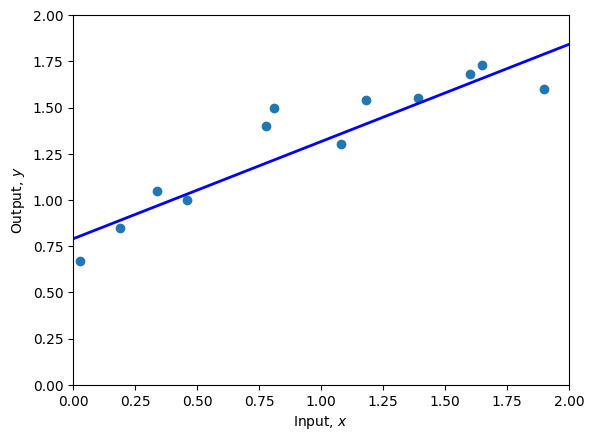

In [ ]:
# Set the intercept and slope as in figure 2.2b
phi0 = -1.49999; phi1 = 1.9
# Plot the data and the model
plot(x,y,phi0,phi1)

In [ ]:

def f(x, phi0, phi1):
  y = (x - phi0)/phi1
  return y

In [ ]:
# Function to help plot the data
def plot(x, y, phi0, phi1):
    fig,ax = plt.subplots()
    ax.scatter(x,y)
    plt.xlim([0,2.0])
    plt.ylim([0,2.0])
    ax.set_xlabel('Input, $x$')
    ax.set_ylabel('Output, $y$')
    # Draw line
    x_line = np.arange(0,2,0.01)
    y_line =  g(x_line, phi0, phi1)
    plt.plot(x_line, y_line,'b-',lw=2)

    plt.show()

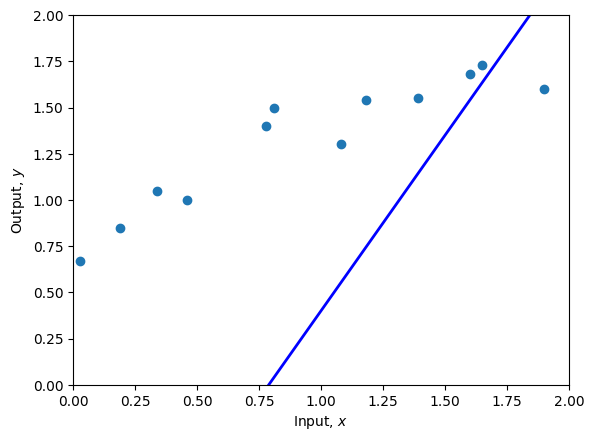

In [ ]:
# Set the intercept and slope as in figure 2.2b
phi0 = -1.49999; phi1 = 1.9
# Plot the data and the model
plot(x,y,phi0,phi1)

### Conclusiones

Es claro que no discrimina de la misma forma, y la razon es porque el espacio  de donde se extraen los datos del mundo real son distintos. Modelan cosas distintas $x$ e $y$ entonces los mismos parametros no deberian funcionar.

- Sabemos que la función inversa de una función no es siempre la misma. Así que de ahí podemos deducir que en realidad van a modelar cosas
distintas. Así que no van a poder discriminar lo mismo.
- De hecho, lo que se quiere al generar la inversa, es modelar otra cosa, tal vez, por eso en el modelo generativo, se hace con la inversa, y creo que somo es supervisado siempre vamos a tener ese conjunto $S = S = \{(x_0 ,y_0)  , (x_0,y_1), ..., (x_n, y_n) \}$

### Preguntas Adicionales  (resultas)

- **Que es la inversa de una regresión?**

- Tenemos las siguientes ideas, la regresión es el proceso de tener un conjunto mas grande de nuestra muestra $y$. Ya que vamos a tener un pequeño conjunto
$S = \{(x_0 ,y_0)  , (x_0,y_1), ..., (x_n, y_n) \} $, yo me imagino, que con la inversa yo ya tengo todas las muestras. Ahora la variable $x$ que era la independiente, la cual 
ayudaba a modelar nuestro fenomeno, me pregunto, que significa ahora, $x = g^{-1}(y, \phi) = \frac{1}{\phi_1 } (-\phi_0 + y)$.
- **Que es una regresión**: es el proceso de ajustar una función a un conjunto de datos y modelar la relación entre las variables dependientes con las independientes

- La definición de un **modelo generativo**. Entiendo que simplemente es invertir la función que modelo nuestra clasificacion o regresión. Imaginando que se pueda invertir, el objetivo seria obtener valores de $x$, con eso, por ejemplo seria obtener unos nuevos datos.